# Example 1 

# Load Data

In [1]:
import pandas as pd
import seaborn as sns

In [2]:
df=pd.read_csv('./Datasets/kyphosis.csv')

In [3]:
df.head()

,Kyphosis,Age,Number,Start
0,absent,71,3,5
1,absent,158,3,14
2,present,128,4,5
3,absent,2,5,1
4,absent,1,4,15


In [4]:
df.describe()

,Age,Number,Start
count,81.000000,81.000000,81.000000
mean,83.654321,4.049383,11.493827
std,58.104251,1.619423,4.883962
min,1.000000,2.000000,1.000000
25%,26.000000,3.000000,9.000000
50%,87.000000,4.000000,13.000000
75%,130.000000,5.000000,16.000000
max,206.000000,10.000000,18.000000


In [5]:
df['Kyphosis'].value_counts() # As we doesnt have equal amount of dataset we wil face some issues in classifying

absent     64
present    17
Name: Kyphosis, dtype: int64

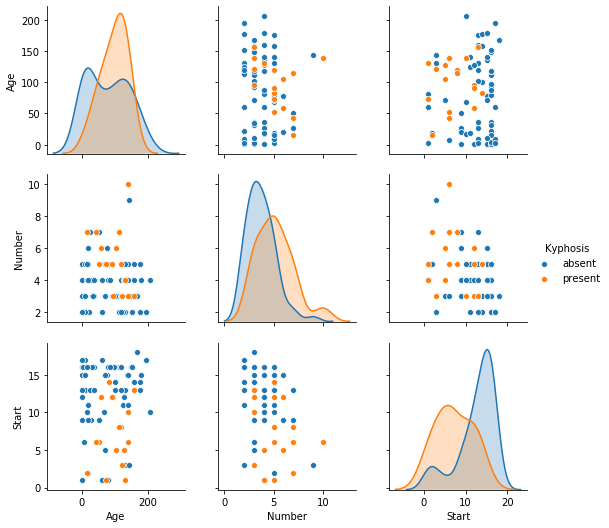

In [6]:
sns.pairplot(df,'Kyphosis')

In [7]:
X=df.iloc[:,1:]

In [8]:
X

,Age,Number,Start
0,71,3,5
1,158,3,14
2,128,4,5
3,2,5,1
4,1,4,15
...,...,...,...
76,157,3,13
77,26,7,13
78,120,2,13
79,42,7,6


In [9]:
y=df.iloc[:,0]

In [10]:
y

0      absent
1      absent
2     present
3      absent
4      absent
       ...   
76    present
77     absent
78     absent
79    present
80     absent
Name: Kyphosis, Length: 81, dtype: object

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

# Using decision tree model

In [13]:
from sklearn.tree import DecisionTreeClassifier

In [14]:
dtc=DecisionTreeClassifier()

In [15]:
dtc.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [16]:
predictions=dtc.predict(X_test)

In [17]:
dtc.score(X_test,y_test)

0.56

In [18]:
from sklearn.metrics import classification_report,confusion_matrix

In [19]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

      absent       0.62      0.67      0.65        15
     present       0.44      0.40      0.42        10

    accuracy                           0.56        25
   macro avg       0.53      0.53      0.53        25
weighted avg       0.55      0.56      0.56        25



In [20]:
print(confusion_matrix(y_test,predictions))

[[10  5]
 [ 6  4]]


# Random Forest

In [21]:
from sklearn.ensemble import RandomForestClassifier

In [22]:
rfc=RandomForestClassifier(n_estimators=200)

In [23]:
rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [24]:
predictions=rfc.predict(X_test)

In [25]:
from sklearn.metrics import classification_report,confusion_matrix

In [26]:
print(confusion_matrix(y_test,predictions))

[[15  0]
 [ 9  1]]


In [27]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

      absent       0.62      1.00      0.77        15
     present       1.00      0.10      0.18        10

    accuracy                           0.64        25
   macro avg       0.81      0.55      0.48        25
weighted avg       0.78      0.64      0.53        25



# Tree Visualization

In [31]:
from IPython.display import Image  
from sklearn.externals.six import StringIO  
from sklearn.tree import export_graphviz
import pydot 

features = list(df.columns[1:])
features

['Age', 'Number', 'Start']

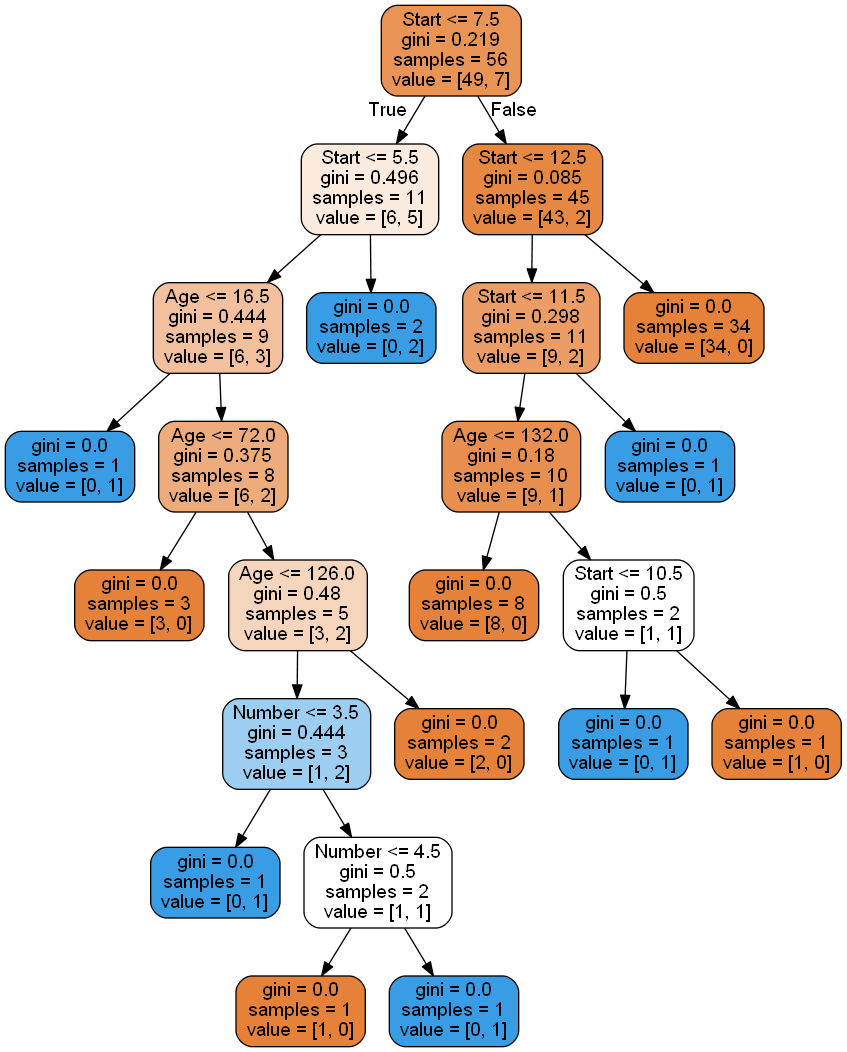

In [34]:
dot_data = StringIO()  
export_graphviz(dtc, out_file=dot_data,feature_names=features,filled=True,rounded=True)

graph = pydot.graph_from_dot_data(dot_data.getvalue())  
Image(graph[0].create_png())  